In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
from __future__ import unicode_literals

import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib notebook

Default plot settings.

In [2]:
try:
    import seaborn as sns
    sns.set()
    sns.set_style("whitegrid")
    sns.set_context("poster")
except ImportError as e:
    print("Cannot import seaborn.")
    print("Consider installing it for nice plot !")

mpl.rcParams['figure.figsize'] = [12.0, 9.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 22
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'


# Introduction



# Load data




In [3]:
from dataset import load_hit_generator

In [4]:
data_path = "./public_data/training/"


In [5]:
event_generator = load_hit_generator(data_path)
event_id, event = next(event_generator)
event.head()

,hit_id,volume_id,layer_id,module_id,x,y,z,ncells,pixels
0,1,0,0,0,888.311,516.677000,-824.216,13,"[[284, 0, 0.094691], [285, 0, 0.154684], [286,..."
1,2,0,0,0,-307.926,716.276000,-515.216,12,"[[284, 0, 0.0148767], [285, 0, 0.136159], [286..."
2,3,0,0,0,-730.339,265.437000,309.124,5,"[[146, 0, 0.124591], [147, 0, 0.194279], [148,..."
3,4,0,0,0,543.024,-559.146000,308.812,6,"[[276, 0, 0.190713], [277, 0, 0.213442], [278,..."
4,5,0,0,0,-783.119,0.588065,-411.579,2,"[[25, 0, 0.368204], [24, 0, 0.379336]]"


# Visualization

In [6]:
event['r'] = np.hypot(event['x'],event['y'])
event['phi'] = np.arctan2(event['y'], event['x'])


In [7]:
n_samples = 1000

event_sample = event.sample(n_samples)

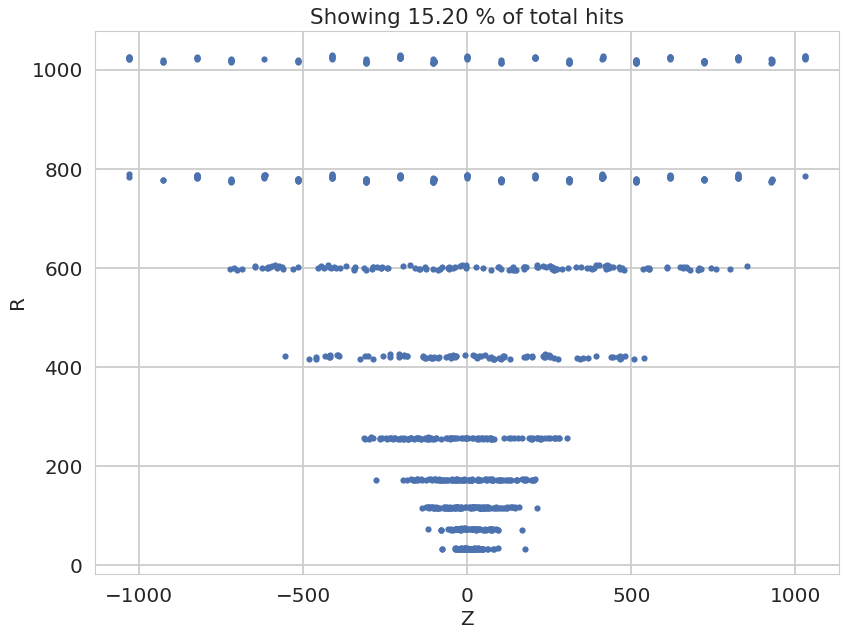

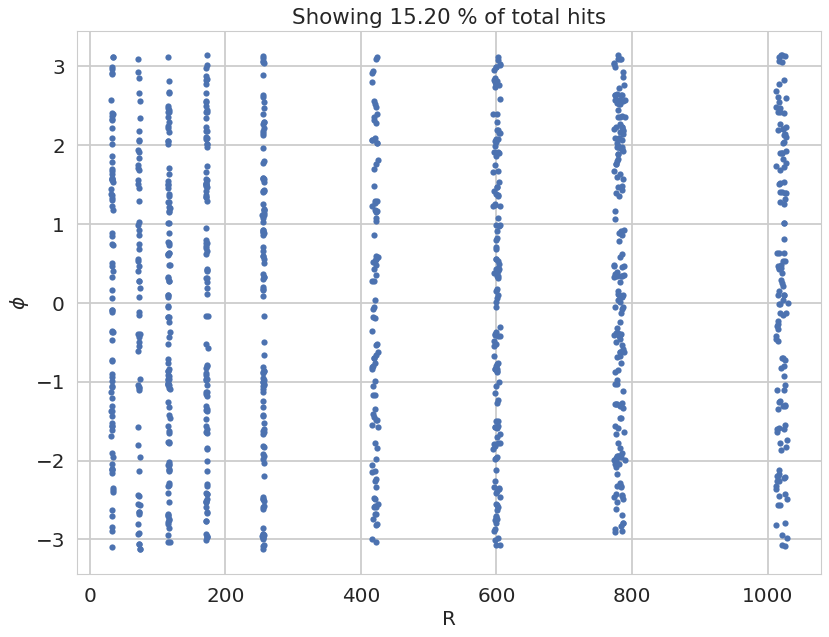

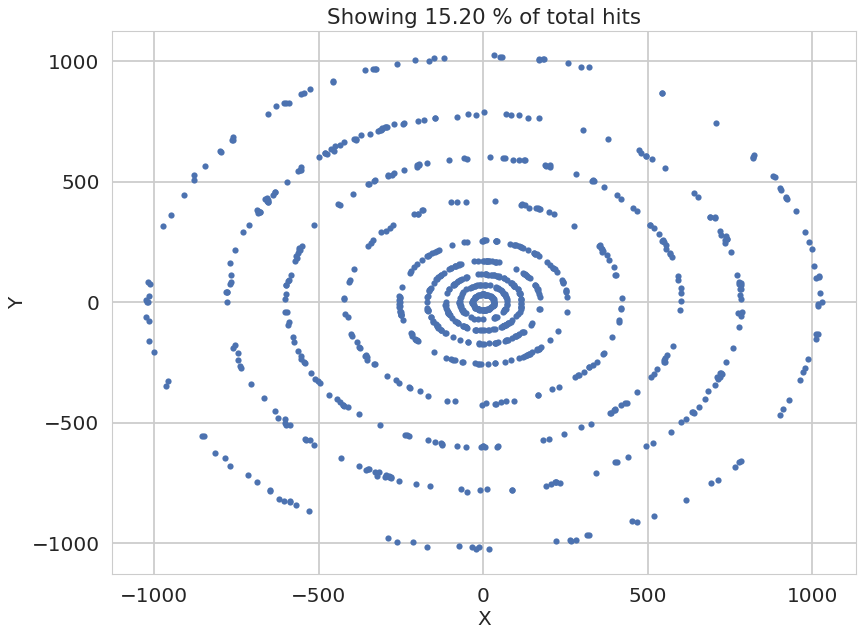

In [8]:
fig = plt.figure()
plt.plot(event_sample.z, event_sample.r, ".")
plt.xlabel("Z")
plt.ylabel("R")
percentage = 100 * len(event_sample) / len(event)
plt.title("Showing {:.2f} % of total hits".format(percentage))
plt.show()

fig = plt.figure()
plt.plot(event_sample.r, event_sample.phi, ".")
plt.xlabel("R")
plt.ylabel("$\phi$")
percentage = 100 * len(event_sample) / len(event)
plt.title("Showing {:.2f} % of total hits".format(percentage))
plt.show()

fig = plt.figure()
plt.plot(event_sample.x, event_sample.y, ".")
plt.xlabel("X")
plt.ylabel("Y")
percentage = 100 * len(event_sample) / len(event)
plt.title("Showing {:.2f} % of total hits".format(percentage))
plt.show()

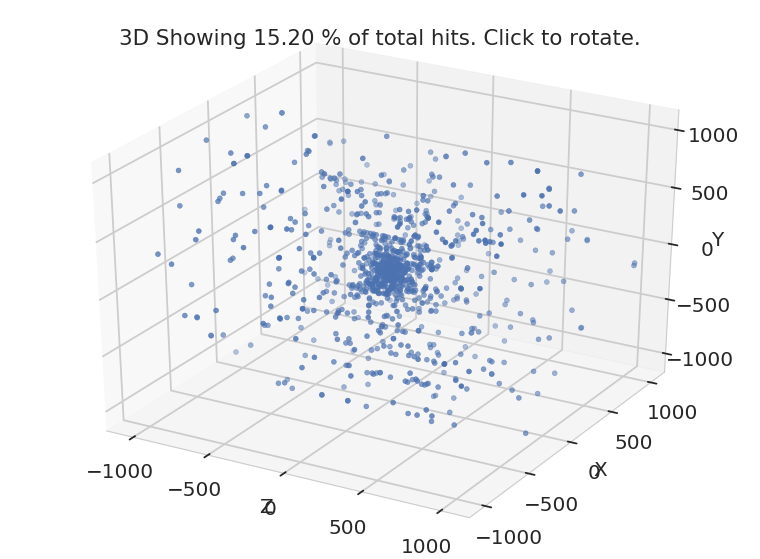

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(event_sample.z, event_sample.x, event_sample.y, ".")

ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')
percentage = 100 * len(event_sample) / len(event)
plt.title("3D Showing {:.2f} % of total hits. Click to rotate.".format(percentage))

plt.show()

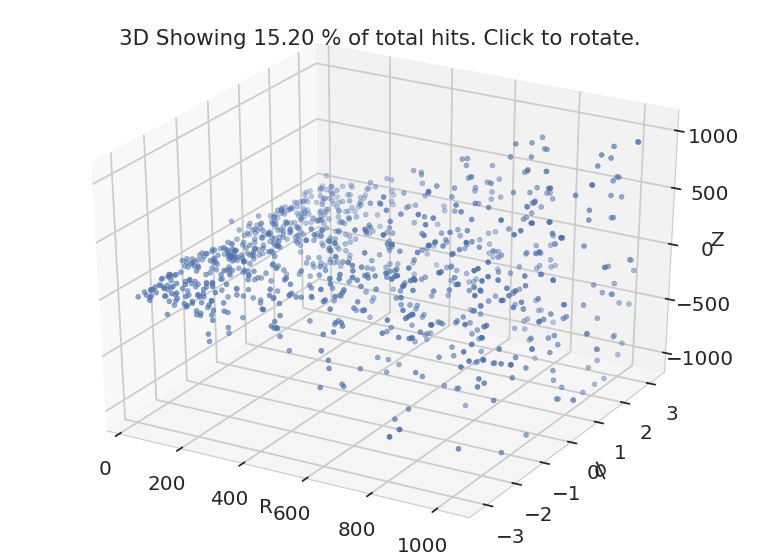

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(event_sample.r, event_sample.phi, event_sample.z, ".")

ax.set_xlabel('R')
ax.set_ylabel('$\phi$')
ax.set_zlabel('Z')
percentage = 100 * len(event_sample) / len(event)
plt.title("3D Showing {:.2f} % of total hits. Click to rotate.".format(percentage))

plt.show()